In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [85]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 50

In [82]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
X_train = train.iloc[:,0:len(train.columns)-2]
Y_train = train.iloc[:,-1]
X_test = test.iloc[:,0:len(test.columns)-2]
Y_test = test.iloc[:,-1]

In [84]:
from collections import Counter
print(pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False))

                      count
fBodyAcc                 79
fBodyGyro                79
fBodyAccJerk             79
tGravityAcc              40
tBodyAcc                 40
tBodyGyroJerk            40
tBodyGyro                40
tBodyAccJerk             40
tBodyAccMag              13
tGravityAccMag           13
tBodyAccJerkMag          13
tBodyGyroMag             13
tBodyGyroJerkMag         13
fBodyAccMag              13
fBodyBodyAccJerkMag      13
fBodyBodyGyroMag         13
fBodyBodyGyroJerkMag     13
angle                     7
subject                   1
Activity                  1


In [63]:
min(train["angle(X,gravityMean)"])

-1.0

In [47]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

le = LabelEncoder()
Y_test = le.fit_transform(Y_test)

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

36


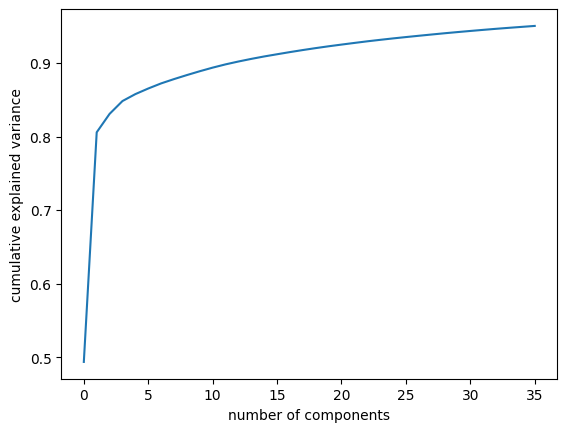

In [54]:
pca = PCA(0.95)

pca.fit(X_train)
pca.fit(X_test)

train_x_pca = pca.transform(X_train)
test_x_pca = pca.transform(X_test)

print(pca.n_components_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [7]:
classifier = LogisticRegression(penalty='l2',solver='lbfgs',class_weight='balanced', max_iter=10000,random_state = 0) 
classifier.fit(train_x_pca, Y_train)

y_pred = classifier.predict(test_x_pca)

Text(0.5, 0, 'Predicted label')

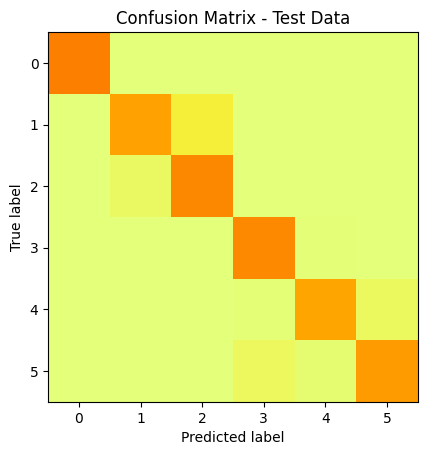

In [8]:
cm = confusion_matrix(Y_test, y_pred) 

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Walking','Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [9]:
print(classification_report(Y_test,y_pred))

print("Accuracy:",accuracy_score(Y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.92      0.81      0.86       491
           2       0.85      0.94      0.89       532
           3       0.92      0.99      0.95       496
           4       0.96      0.90      0.92       420
           5       0.91      0.89      0.90       471

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947

Accuracy: 92.19545300305396
